In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\MSIS\FML Lab\Part 1\Dataset\diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Checking NULL vlaues
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values

In [6]:
#Splitting Dataset into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
#Standard Scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [8]:
#Applying PCA to reduce no. of columns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.2595475 , 0.22020622])

In [9]:
#Implementing LogesticRegression Model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [10]:
y_pred=classifier.predict(X_test)

In [11]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[94, 13],
       [24, 23]], dtype=int64)

In [12]:
#Accuracy of the Model
from sklearn import metrics
prediction=metrics.accuracy_score(y_test,y_pred)
print("Accuracy : ",prediction*100,"%")

Accuracy :  75.97402597402598 %


C:\Users\akash\AppData\Local\Temp\ipykernel_4940\2739423871.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


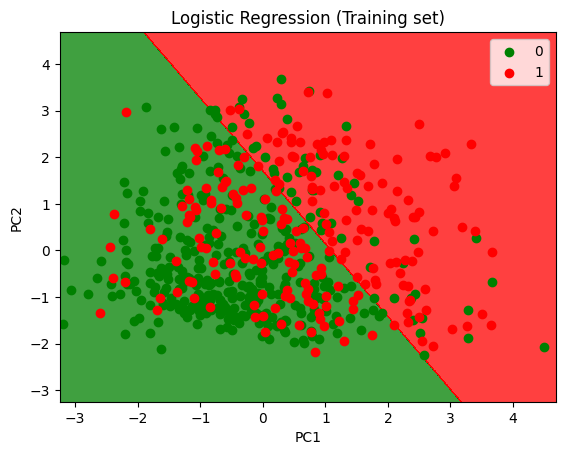

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set , Y_set = X_train ,y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))
plt.contourf(X1 , X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('green','red')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())

for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],
              c = ListedColormap(('green','red'))(i),label =j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_4940\586890756.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


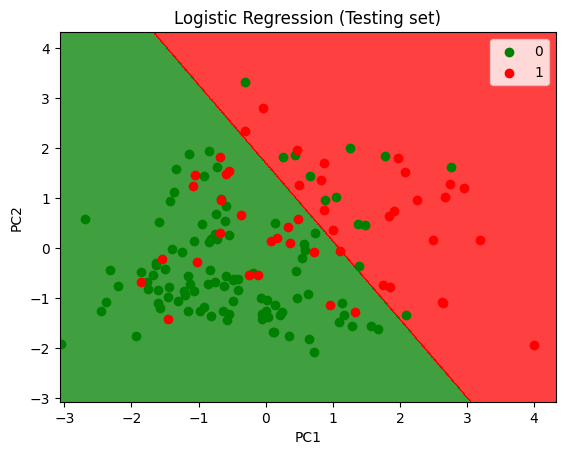

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set , Y_set = X_test ,y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))
plt.contourf(X1 , X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('green','red')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())

for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],
              c = ListedColormap(('green','red'))(i),label =j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()